# Problem Statement

Airbnb Inc is an online marketplace for arranging or offering lodging, primarily homestays, or tourism experiences. Airbnb has close to 150 million customers across the world. Price is the most important factor considered by the customer while making booking into a property. Strategic pricing of the properties is important to avoid losing customers to the competitors.  
  
We have a data of 74111 Airbnb properties across the nations. Based on this data build a simple and multiple linear regression model to predict the strategic pricing of a new listed property on Airbnb.


In [1]:
import numpy as np   
import pandas as pd    
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import matplotlib.pyplot as plt   
import matplotlib.style

### Importing data

In [2]:
# reading the CSV file into pandas dataframe
df = pd.read_csv("AirBNB.csv")  

E:\Anaconda\lib\site-packages\IPython\core\interactiveshell.py:3441: DtypeWarning: Columns (5) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


### EDA

In [3]:
# Check top few records to get a feel of the data structure
df.head()

,id,room_type,accommodates,bathrooms,cancellation_policy,cleaning_fee,instant_bookable,review_scores_rating,bedrooms,beds,log_price
0,6901257,Entire home/apt,3.0,1.0,strict,True,f,100.0,1.0,1.0,5.010635
1,6304928,Entire home/apt,7.0,1.0,strict,True,t,93.0,3.0,3.0,5.129899
2,7919400,Entire home/apt,5.0,1.0,moderate,True,t,92.0,1.0,3.0,4.976734
3,13418779,Entire home/apt,4.0,1.0,flexible,True,f,NaN,2.0,2.0,6.620073
4,3808709,Entire home/apt,2.0,1.0,moderate,True,t,40.0,0.0,1.0,4.744932


In [4]:
# drop the id column as it is useless for the model
df = df.drop('id', axis=1)

In [5]:
df.head()

,room_type,accommodates,bathrooms,cancellation_policy,cleaning_fee,instant_bookable,review_scores_rating,bedrooms,beds,log_price
0,Entire home/apt,3.0,1.0,strict,True,f,100.0,1.0,1.0,5.010635
1,Entire home/apt,7.0,1.0,strict,True,t,93.0,3.0,3.0,5.129899
2,Entire home/apt,5.0,1.0,moderate,True,t,92.0,1.0,3.0,4.976734
3,Entire home/apt,4.0,1.0,flexible,True,f,NaN,2.0,2.0,6.620073
4,Entire home/apt,2.0,1.0,moderate,True,t,40.0,0.0,1.0,4.744932


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74111 entries, 0 to 74110
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   room_type             74106 non-null  object 
 1   accommodates          74108 non-null  float64
 2   bathrooms             73908 non-null  float64
 3   cancellation_policy   74103 non-null  object 
 4   cleaning_fee          74107 non-null  object 
 5   instant_bookable      74111 non-null  object 
 6   review_scores_rating  57389 non-null  float64
 7   bedrooms              74019 non-null  float64
 8   beds                  73980 non-null  float64
 9   log_price             74111 non-null  float64
dtypes: float64(6), object(4)
memory usage: 5.7+ MB


In [7]:
df.describe()

,accommodates,bathrooms,review_scores_rating,bedrooms,beds,log_price
count,74108.000000,73908.000000,57389.000000,74019.000000,73980.000000,74111.000000
mean,3.155125,1.235272,94.067365,1.265797,1.710868,4.782069
std,2.153603,0.582054,7.836556,0.852149,1.254142,0.717394
min,1.000000,0.000000,20.000000,0.000000,0.000000,0.000000
25%,2.000000,1.000000,92.000000,1.000000,1.000000,4.317488
50%,2.000000,1.000000,96.000000,1.000000,1.000000,4.709530
75%,4.000000,1.000000,100.000000,1.000000,2.000000,5.220356
max,16.000000,8.000000,100.000000,10.000000,18.000000,7.600402


### unique values for categorical variables

In [8]:
for column in df.columns:
    if df[column].dtype == 'object':
        print(column.upper(),': ',df[column].nunique())
        print(df[column].value_counts().sort_values())
        print('\n')

ROOM_TYPE :  3
Shared room         2163
Private room       30635
Entire home/apt    41308
Name: room_type, dtype: int64


CANCELLATION_POLICY :  3
moderate    19060
flexible    22543
strict      32500
Name: cancellation_policy, dtype: int64


CLEANING_FEE :  2
False    19708
True     54399
Name: cleaning_fee, dtype: int64


INSTANT_BOOKABLE :  2
t    19451
f    54660
Name: instant_bookable, dtype: int64




### Converting Instant_bookable from 'f' and 't' to boolean

In [9]:
df.instant_bookable.replace(['f','t'],[False,True],inplace=True )

### Converting categorical to dummy variables

In [10]:
df = pd.get_dummies(df, columns=['room_type','cancellation_policy','cleaning_fee'],drop_first=True)

In [11]:
df.head()

,accommodates,bathrooms,instant_bookable,review_scores_rating,bedrooms,beds,log_price,room_type_Private room,room_type_Shared room,cancellation_policy_moderate,cancellation_policy_strict,cleaning_fee_True
0,3.0,1.0,False,100.0,1.0,1.0,5.010635,0,0,0,1,1
1,7.0,1.0,True,93.0,3.0,3.0,5.129899,0,0,0,1,1
2,5.0,1.0,True,92.0,1.0,3.0,4.976734,0,0,1,0,1
3,4.0,1.0,False,NaN,2.0,2.0,6.620073,0,0,0,0,1
4,2.0,1.0,True,40.0,0.0,1.0,4.744932,0,0,1,0,1


In [12]:
# Are there any missing values ?
df.isnull().sum()

accommodates                        3
bathrooms                         203
instant_bookable                    0
review_scores_rating            16722
bedrooms                           92
beds                              131
log_price                           0
room_type_Private room              0
room_type_Shared room               0
cancellation_policy_moderate        0
cancellation_policy_strict          0
cleaning_fee_True                   0
dtype: int64

### Imputing missing values

In [13]:
for column in df.columns:
    if df[column].dtype != 'object':
        mean = df[column].mean()
        df[column] = df[column].fillna(mean)    
        
df.isnull().sum()        

accommodates                    0
bathrooms                       0
instant_bookable                0
review_scores_rating            0
bedrooms                        0
beds                            0
log_price                       0
room_type_Private room          0
room_type_Shared room           0
cancellation_policy_moderate    0
cancellation_policy_strict      0
cleaning_fee_True               0
dtype: int64

In [14]:
df.head()

,accommodates,bathrooms,instant_bookable,review_scores_rating,bedrooms,beds,log_price,room_type_Private room,room_type_Shared room,cancellation_policy_moderate,cancellation_policy_strict,cleaning_fee_True
0,3.0,1.0,False,100.000000,1.0,1.0,5.010635,0,0,0,1,1
1,7.0,1.0,True,93.000000,3.0,3.0,5.129899,0,0,0,1,1
2,5.0,1.0,True,92.000000,1.0,3.0,4.976734,0,0,1,0,1
3,4.0,1.0,False,94.067365,2.0,2.0,6.620073,0,0,0,0,1
4,2.0,1.0,True,40.000000,0.0,1.0,4.744932,0,0,1,0,1


### Checking for duplicates

In [15]:
# Are there any duplicates ?
dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))
#df[dups]

Number of duplicate rows = 19998


In [16]:
print('Before',df.shape)
df.drop_duplicates(inplace=True) 
print('After',df.shape)

Before (74111, 12)
After (54113, 12)


In [17]:
dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

Number of duplicate rows = 0


### Correlation Plot

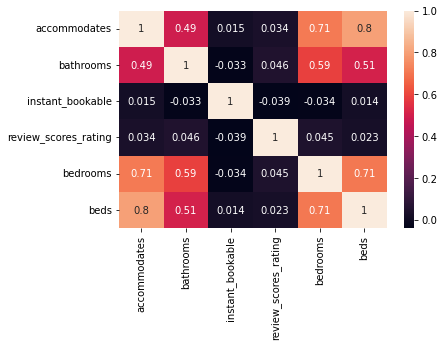

In [18]:
sns.heatmap(df.iloc[:, 0:6].corr(),annot=True)
plt.show()

**The variable 'Accommodates', 'bedrooms','bathrooms', 'beds' are having correlation with each other.**


### Train-Test Split

In [19]:
# Copy all the predictor variables into X dataframe
X = df.drop('log_price', axis=1)

# Copy target into the y dataframe. 
y = df[['log_price']]

In [20]:
X.head()

,accommodates,bathrooms,instant_bookable,review_scores_rating,bedrooms,beds,room_type_Private room,room_type_Shared room,cancellation_policy_moderate,cancellation_policy_strict,cleaning_fee_True
0,3.0,1.0,False,100.000000,1.0,1.0,0,0,0,1,1
1,7.0,1.0,True,93.000000,3.0,3.0,0,0,0,1,1
2,5.0,1.0,True,92.000000,1.0,3.0,0,0,1,0,1
3,4.0,1.0,False,94.067365,2.0,2.0,0,0,0,0,1
4,2.0,1.0,True,40.000000,0.0,1.0,0,0,1,0,1


In [21]:
# Split X and y into training and test set in 70:30 ratio
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=1)

### Linear Regression Model

In [22]:
# invoke the LinearRegression function and find the bestfit model on training data

regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

LinearRegression()

In [23]:
# Let us check the intercept for the model

intercept = regression_model.intercept_[0]

print("The intercept for our model is {}".format(intercept))

# Let us explore the coefficients for each of the independent attributes

for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

The intercept for our model is 4.061085914311626
The coefficient for accommodates is 0.07515213535889807
The coefficient for bathrooms is 0.14472274061182017
The coefficient for instant_bookable is -0.06534341394513019
The coefficient for review_scores_rating is 0.00637402693883674
The coefficient for bedrooms is 0.15592946288698853
The coefficient for beds is -0.05155025468997646
The coefficient for room_type_Private room is -0.6448159892897046
The coefficient for room_type_Shared room is -1.1340999122703492
The coefficient for cancellation_policy_moderate is -0.06006488813329978
The coefficient for cancellation_policy_strict is -0.011203532935227013
The coefficient for cleaning_fee_True is -0.08071329727028435


In [30]:
np.exp(np.log(180) + 0.075)

194.0191471592337

In [27]:
np.exp(y_train).describe()

,log_price
count,37879.000000
mean,178.486496
std,188.375811
min,1.000000
25%,79.000000
50%,125.000000
75%,200.000000
max,1999.000001


In [25]:
y_train.describe()

,log_price
count,37879.000000
mean,4.866590
std,0.755551
min,0.000000
25%,4.369448
50%,4.828314
75%,5.298317
max,7.600402


In [31]:
# R square on training data
regression_model.score(X_train, y_train)

0.5040081192376529

50% of the variation in the log_price is explained by the predictors in the model for train set

In [32]:
# R square on testing data
regression_model.score(X_test, y_test)

0.5040019908822924

In [33]:
#RMSE on Training data
predicted_train=regression_model.fit(X_train, y_train).predict(X_train)
metrics.mean_squared_error(y_train,predicted_train,squared=False)

0.532102340528593

In [34]:
#RMSE on Testing data
predicted_test=regression_model.fit(X_train, y_train).predict(X_test)
metrics.mean_squared_error(y_test,predicted_test,squared=False)

0.5326139781409456

### Linear Regression using statsmodels

In [35]:
## Method 1 for statsmodels

import statsmodels.api as sm

In [37]:
sm.add_constant(X_train)
#X_train

E:\Anaconda\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


,const,accommodates,bathrooms,instant_bookable,review_scores_rating,bedrooms,beds,room_type_Private room,room_type_Shared room,cancellation_policy_moderate,cancellation_policy_strict,cleaning_fee_True
57216,1.0,2.0,1.0,False,94.067365,1.0,1.0,0,0,0,1,1
37308,1.0,1.0,2.0,False,94.067365,3.0,1.0,1,0,0,0,0
6798,1.0,1.0,2.0,True,99.000000,1.0,1.0,1,0,0,1,0
50997,1.0,2.0,1.0,True,92.000000,0.0,1.0,0,0,0,1,1
2105,1.0,16.0,1.0,False,100.000000,0.0,1.0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
67671,1.0,3.0,1.0,False,83.000000,1.0,2.0,0,1,0,1,1
41095,1.0,1.0,1.0,False,100.000000,1.0,1.0,0,0,0,1,1
5556,1.0,4.0,1.0,False,98.000000,1.0,2.0,0,0,0,1,1
13799,1.0,2.0,1.0,True,100.000000,1.0,1.0,1,0,0,1,1


In [38]:
model = sm.OLS(y_train.astype(float),X_train.astype(float)).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              log_price   R-squared (uncentered):                   0.984
Model:                            OLS   Adj. R-squared (uncentered):              0.984
Method:                 Least Squares   F-statistic:                          2.150e+05
Date:                Thu, 07 Oct 2021   Prob (F-statistic):                        0.00
Time:                        20:41:39   Log-Likelihood:                         -35535.
No. Observations:               37879   AIC:                                  7.109e+04
Df Residuals:                   37868   BIC:                                  7.119e+04
Df Model:                          11                                                  
Covariance Type:            nonrobust                                                  
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
accommodates                     0.0914      0.003     35.924      0.000       0.086       0.096
bathrooms                        0.1833      0.006     29.819      0.000       0.171       0.195
instant_bookable                -0.0151      0.007     -2.172      0.030      -0.029      -0.001
review_scores_rating             0.0468      0.000    406.567      0.000       0.047       0.047
bedrooms                         0.1416      0.005     26.437      0.000       0.131       0.152
beds                            -0.0470      0.004    -11.581      0.000      -0.055      -0.039
room_type_Private room          -0.5058      0.008    -66.489      0.000      -0.521      -0.491
room_type_Shared room           -0.9774      0.018    -53.340      0.000      -1.013      -0.941
cancellation_policy_moderate    -0.0155      0.009     -1.738      0.082      -0.033       0.002
cancellation_policy_strict       0.0644      0.008      7.940      0.000       0.048       0.080
cleaning_fee_True               -0.0095      0.008     -1.224      0.221      -0.025       0.006
==============================================================================
Omnibus:                     7215.017   Durbin-Watson:                   2.012
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            25493.761
Skew:                           0.942   Prob(JB):                         0.00
Kurtosis:                       6.550   Cond. No.                         544.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [39]:
model = sm.OLS(y_train.astype(float),sm.add_constant(X_train.astype(float))).fit()
model.summary()

E:\Anaconda\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.504
Model:                            OLS   Adj. R-squared:                  0.504
Method:                 Least Squares   F-statistic:                     3498.
Date:                Thu, 07 Oct 2021   Prob (F-statistic):               0.00
Time:                        20:42:26   Log-Likelihood:                -29849.
No. Observations:               37879   AIC:                         5.972e+04
Df Residuals:                   37867   BIC:                         5.983e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                            4.0611      0.035    115.145      0.000       3.992       4.130
accommodates                     0.0752      0.002     34.246      0.000       0.071       0.079
bathrooms                        0.1447      0.005     27.304      0.000       0.134       0.155
instant_bookable                -0.0653      0.006    -10.894      0.000      -0.077      -0.054
review_scores_rating             0.0064      0.000     17.485      0.000       0.006       0.007
bedrooms                         0.1559      0.005     33.816      0.000       0.147       0.165
beds                            -0.0516      0.003    -14.745      0.000      -0.058      -0.045
room_type_Private room          -0.6448      0.007    -96.863      0.000      -0.658      -0.632
room_type_Shared room           -1.1341      0.016    -71.649      0.000      -1.165      -1.103
cancellation_policy_moderate    -0.0601      0.008     -7.795      0.000      -0.075      -0.045
cancellation_policy_strict      -0.0112      0.007     -1.599      0.110      -0.025       0.003
cleaning_fee_True               -0.0807      0.007    -11.968      0.000      -0.094      -0.067
==============================================================================
Omnibus:                     3878.073   Durbin-Watson:                   2.028
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             9318.594
Skew:                           0.614   Prob(JB):                         0.00
Kurtosis:                       5.097   Cond. No.                     1.21e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.21e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [40]:
## Method 2

# concatenate X and y into a single dataframe
data_train = pd.concat([X_train, y_train], axis=1)
data_test=pd.concat([X_test,y_test],axis=1)
data_train.head()

,accommodates,bathrooms,instant_bookable,review_scores_rating,bedrooms,beds,room_type_Private room,room_type_Shared room,cancellation_policy_moderate,cancellation_policy_strict,cleaning_fee_True,log_price
57216,2.0,1.0,False,94.067365,1.0,1.0,0,0,0,1,1,4.804021
37308,1.0,2.0,False,94.067365,3.0,1.0,1,0,0,0,0,3.688879
6798,1.0,2.0,True,99.000000,1.0,1.0,1,0,0,1,0,3.806662
50997,2.0,1.0,True,92.000000,0.0,1.0,0,0,0,1,1,5.010635
2105,16.0,1.0,False,100.000000,0.0,1.0,0,0,0,1,1,6.396930


In [41]:
data_train.rename(columns = {"room_type_Entire home/apt": "room_type_entire_home", "room_type_Private room": "room_type_private_room", 
                     "room_type_Shared room": "room_type_shared_room"}, 
                      inplace = True) 

data_test.rename(columns = {"room_type_Entire home/apt": "room_type_entire_home", "room_type_Private room": "room_type_private_room", 
                     "room_type_Shared room": "room_type_shared_room"}, 
                      inplace = True) 

In [42]:
data_train.columns

Index(['accommodates', 'bathrooms', 'instant_bookable', 'review_scores_rating',
       'bedrooms', 'beds', 'room_type_private_room', 'room_type_shared_room',
       'cancellation_policy_moderate', 'cancellation_policy_strict',
       'cleaning_fee_True', 'log_price'],
      dtype='object')

In [44]:
expr= 'log_price ~ accommodates + bathrooms + instant_bookable+review_scores_rating +bedrooms + beds + room_type_private_room + room_type_shared_room  + cancellation_policy_moderate + cancellation_policy_strict + cleaning_fee_True'

In [45]:
import statsmodels.formula.api as smf
lm1 = smf.ols(formula= expr, data = data_train).fit()
lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.504
Model:                            OLS   Adj. R-squared:                  0.504
Method:                 Least Squares   F-statistic:                     3498.
Date:                Thu, 07 Oct 2021   Prob (F-statistic):               0.00
Time:                        20:44:46   Log-Likelihood:                -29849.
No. Observations:               37879   AIC:                         5.972e+04
Df Residuals:                   37867   BIC:                         5.983e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                        4.0611      0.035    115.145      0.000       3.992       4.130
instant_bookable[T.True]        -0.0653      0.006    -10.894      0.000      -0.077      -0.054
accommodates                     0.0752      0.002     34.246      0.000       0.071       0.079
bathrooms                        0.1447      0.005     27.304      0.000       0.134       0.155
review_scores_rating             0.0064      0.000     17.485      0.000       0.006       0.007
bedrooms                         0.1559      0.005     33.816      0.000       0.147       0.165
beds                            -0.0516      0.003    -14.745      0.000      -0.058      -0.045
room_type_private_room          -0.6448      0.007    -96.863      0.000      -0.658      -0.632
room_type_shared_room           -1.1341      0.016    -71.649      0.000      -1.165      -1.103
cancellation_policy_moderate    -0.0601      0.008     -7.795      0.000      -0.075      -0.045
cancellation_policy_strict      -0.0112      0.007     -1.599      0.110      -0.025       0.003
cleaning_fee_True               -0.0807      0.007    -11.968      0.000      -0.094      -0.067
==============================================================================
Omnibus:                     3878.073   Durbin-Watson:                   2.028
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             9318.594
Skew:                           0.614   Prob(JB):                         0.00
Kurtosis:                       5.097   Cond. No.                     1.21e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.21e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

The overall P value is less than alpha, so rejecting H0 and accepting Ha that atleast 1 regression co-efficient is not 0. Here all regression co-efficients are not 0

In [46]:
# Calculate MSE
mse = np.mean((lm1.predict(data_train.drop('log_price',axis=1))-data_train['log_price'])**2)

In [47]:
#Root Mean Squared Error - RMSE
np.sqrt(mse)

0.5321023405285942

In [48]:
# Prediction on Test data
y_pred = lm1.predict(data_test)
metrics.mean_squared_error(y_true=y_test,y_pred=y_pred,squared=False)

0.5326139781409462

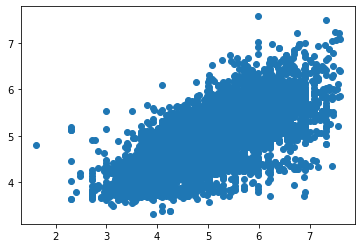

In [49]:
plt.scatter(y_test['log_price'], y_pred)
plt.show()

In [50]:
for i,j in np.array(lm1.params.reset_index()):
    print('({}) * {} +'.format(round(j,2),i),end=' ')

(4.06) * Intercept + (-0.07) * instant_bookable[T.True] + (0.08) * accommodates + (0.14) * bathrooms + (0.01) * review_scores_rating + (0.16) * bedrooms + (-0.05) * beds + (-0.64) * room_type_private_room + (-1.13) * room_type_shared_room + (-0.06) * cancellation_policy_moderate + (-0.01) * cancellation_policy_strict + (-0.08) * cleaning_fee_True + 

## Polynomial Regression

In [51]:
data_train['review_scores_rating_square'] = data_train['review_scores_rating']**2
data_test['review_scores_rating_square'] = data_test['review_scores_rating']**2

In [52]:
expr= 'log_price ~ accommodates + bathrooms + instant_bookable+review_scores_rating +bedrooms + beds + room_type_private_room + room_type_shared_room  + cancellation_policy_moderate + cancellation_policy_strict + cleaning_fee_True + review_scores_rating_square'
lm2 = smf.ols(formula= expr, data = data_train).fit()
lm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.505
Model:                            OLS   Adj. R-squared:                  0.505
Method:                 Least Squares   F-statistic:                     3223.
Date:                Thu, 07 Oct 2021   Prob (F-statistic):               0.00
Time:                        20:54:47   Log-Likelihood:                -29800.
No. Observations:               37879   AIC:                         5.963e+04
Df Residuals:                   37866   BIC:                         5.974e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                        4.8988      0.091     53.553      0.000       4.719       5.078
instant_bookable[T.True]        -0.0637      0.006    -10.631      0.000      -0.075      -0.052
accommodates                     0.0756      0.002     34.472      0.000       0.071       0.080
bathrooms                        0.1434      0.005     27.071      0.000       0.133       0.154
review_scores_rating            -0.0156      0.002     -6.951      0.000      -0.020      -0.011
bedrooms                         0.1550      0.005     33.649      0.000       0.146       0.164
beds                            -0.0515      0.003    -14.736      0.000      -0.058      -0.045
room_type_private_room          -0.6442      0.007    -96.885      0.000      -0.657      -0.631
room_type_shared_room           -1.1324      0.016    -71.632      0.000      -1.163      -1.101
cancellation_policy_moderate    -0.0598      0.008     -7.771      0.000      -0.075      -0.045
cancellation_policy_strict      -0.0081      0.007     -1.158      0.247      -0.022       0.006
cleaning_fee_True               -0.0810      0.007    -12.019      0.000      -0.094      -0.068
review_scores_rating_square      0.0001   1.39e-05      9.923      0.000       0.000       0.000
==============================================================================
Omnibus:                     3895.437   Durbin-Watson:                   2.028
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             9463.190
Skew:                           0.613   Prob(JB):                         0.00
Kurtosis:                       5.120   Cond. No.                     2.97e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.97e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [53]:
# Calculate MSE
mse = np.mean((lm2.predict(data_train.drop('log_price',axis=1))-data_train['log_price'])**2)
#Root Mean Squared Error - RMSE
np.sqrt(mse)

0.5314119122167883

In [54]:
# Prediction on Test data
y_pred_1 = lm2.predict(data_test)

In [55]:
metrics.mean_squared_error(y_true=y_test,y_pred=y_pred_1,squared=False)

0.5319920273223196

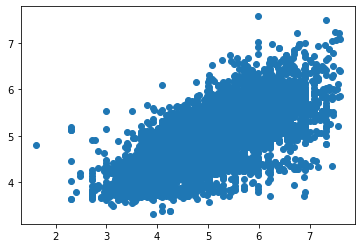

In [56]:
plt.scatter(y_test['log_price'], y_pred)
plt.show()

In [57]:
## Polynomial Feature Generation

from sklearn.preprocessing import PolynomialFeatures # import PolynomialFeatures library
poly = PolynomialFeatures(degree=2,include_bias=False) # create an object of PolynomialFeatures with only the interaction terms

In [58]:
X.columns

Index(['accommodates', 'bathrooms', 'instant_bookable', 'review_scores_rating',
       'bedrooms', 'beds', 'room_type_Private room', 'room_type_Shared room',
       'cancellation_policy_moderate', 'cancellation_policy_strict',
       'cleaning_fee_True'],
      dtype='object')

In [59]:
X_poly_train_1 = X_train.drop(labels=['instant_bookable','room_type_Private room','room_type_Shared room','cancellation_policy_moderate','cancellation_policy_strict','cleaning_fee_True'],axis=1)
X_poly_train_1

,accommodates,bathrooms,review_scores_rating,bedrooms,beds
57216,2.0,1.0,94.067365,1.0,1.0
37308,1.0,2.0,94.067365,3.0,1.0
6798,1.0,2.0,99.000000,1.0,1.0
50997,2.0,1.0,92.000000,0.0,1.0
2105,16.0,1.0,100.000000,0.0,1.0
...,...,...,...,...,...
67671,3.0,1.0,83.000000,1.0,2.0
41095,1.0,1.0,100.000000,1.0,1.0
5556,4.0,1.0,98.000000,1.0,2.0
13799,2.0,1.0,100.000000,1.0,1.0


In [60]:
X_poly_train = pd.DataFrame(poly.fit_transform(X_poly_train_1),columns = poly.get_feature_names(X_poly_train_1.columns),index=X_poly_train_1.index)
X_poly_train

,accommodates,bathrooms,review_scores_rating,bedrooms,beds,accommodates^2,accommodates bathrooms,accommodates review_scores_rating,accommodates bedrooms,accommodates beds,bathrooms^2,bathrooms review_scores_rating,bathrooms bedrooms,bathrooms beds,review_scores_rating^2,review_scores_rating bedrooms,review_scores_rating beds,bedrooms^2,bedrooms beds,beds^2
57216,2.0,1.0,94.067365,1.0,1.0,4.0,2.0,188.134730,2.0,2.0,1.0,94.067365,1.0,1.0,8848.669125,94.067365,94.067365,1.0,1.0,1.0
37308,1.0,2.0,94.067365,3.0,1.0,1.0,2.0,94.067365,3.0,1.0,4.0,188.134730,6.0,2.0,8848.669125,282.202094,94.067365,9.0,3.0,1.0
6798,1.0,2.0,99.000000,1.0,1.0,1.0,2.0,99.000000,1.0,1.0,4.0,198.000000,2.0,2.0,9801.000000,99.000000,99.000000,1.0,1.0,1.0
50997,2.0,1.0,92.000000,0.0,1.0,4.0,2.0,184.000000,0.0,2.0,1.0,92.000000,0.0,1.0,8464.000000,0.000000,92.000000,0.0,0.0,1.0
2105,16.0,1.0,100.000000,0.0,1.0,256.0,16.0,1600.000000,0.0,16.0,1.0,100.000000,0.0,1.0,10000.000000,0.000000,100.000000,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67671,3.0,1.0,83.000000,1.0,2.0,9.0,3.0,249.000000,3.0,6.0,1.0,83.000000,1.0,2.0,6889.000000,83.000000,166.000000,1.0,2.0,4.0
41095,1.0,1.0,100.000000,1.0,1.0,1.0,1.0,100.000000,1.0,1.0,1.0,100.000000,1.0,1.0,10000.000000,100.000000,100.000000,1.0,1.0,1.0
5556,4.0,1.0,98.000000,1.0,2.0,16.0,4.0,392.000000,4.0,8.0,1.0,98.000000,1.0,2.0,9604.000000,98.000000,196.000000,1.0,2.0,4.0
13799,2.0,1.0,100.000000,1.0,1.0,4.0,2.0,200.000000,2.0,2.0,1.0,100.000000,1.0,1.0,10000.000000,100.000000,100.000000,1.0,1.0,1.0


In [61]:
X_poly_train['instant_bookable'] = X_train['instant_bookable']
X_poly_train['room_type_Private room'] = X_train['room_type_Private room']
X_poly_train['room_type_Shared room'] = X_train['room_type_Shared room']
X_poly_train['cancellation_policy_moderate'] = X_train['cancellation_policy_moderate']
X_poly_train['cancellation_policy_strict'] = X_train['cancellation_policy_strict']
X_poly_train['cleaning_fee_True'] = X_train['cleaning_fee_True']

In [62]:
X_poly_train

,accommodates,bathrooms,review_scores_rating,bedrooms,beds,accommodates^2,accommodates bathrooms,accommodates review_scores_rating,accommodates bedrooms,accommodates beds,...,review_scores_rating beds,bedrooms^2,bedrooms beds,beds^2,instant_bookable,room_type_Private room,room_type_Shared room,cancellation_policy_moderate,cancellation_policy_strict,cleaning_fee_True
57216,2.0,1.0,94.067365,1.0,1.0,4.0,2.0,188.134730,2.0,2.0,...,94.067365,1.0,1.0,1.0,False,0,0,0,1,1
37308,1.0,2.0,94.067365,3.0,1.0,1.0,2.0,94.067365,3.0,1.0,...,94.067365,9.0,3.0,1.0,False,1,0,0,0,0
6798,1.0,2.0,99.000000,1.0,1.0,1.0,2.0,99.000000,1.0,1.0,...,99.000000,1.0,1.0,1.0,True,1,0,0,1,0
50997,2.0,1.0,92.000000,0.0,1.0,4.0,2.0,184.000000,0.0,2.0,...,92.000000,0.0,0.0,1.0,True,0,0,0,1,1
2105,16.0,1.0,100.000000,0.0,1.0,256.0,16.0,1600.000000,0.0,16.0,...,100.000000,0.0,0.0,1.0,False,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67671,3.0,1.0,83.000000,1.0,2.0,9.0,3.0,249.000000,3.0,6.0,...,166.000000,1.0,2.0,4.0,False,0,1,0,1,1
41095,1.0,1.0,100.000000,1.0,1.0,1.0,1.0,100.000000,1.0,1.0,...,100.000000,1.0,1.0,1.0,False,0,0,0,1,1
5556,4.0,1.0,98.000000,1.0,2.0,16.0,4.0,392.000000,4.0,8.0,...,196.000000,1.0,2.0,4.0,False,0,0,0,1,1
13799,2.0,1.0,100.000000,1.0,1.0,4.0,2.0,200.000000,2.0,2.0,...,100.000000,1.0,1.0,1.0,True,1,0,0,1,1


In [63]:
X_poly_test_1 = X_test.drop(labels=['instant_bookable','room_type_Private room','room_type_Shared room','cancellation_policy_moderate','cancellation_policy_strict','cleaning_fee_True'],axis=1)
X_poly_test = pd.DataFrame(poly.transform(X_poly_test_1),columns = poly.get_feature_names(X_poly_test_1.columns),index=X_poly_test_1.index)
X_poly_test

,accommodates,bathrooms,review_scores_rating,bedrooms,beds,accommodates^2,accommodates bathrooms,accommodates review_scores_rating,accommodates bedrooms,accommodates beds,bathrooms^2,bathrooms review_scores_rating,bathrooms bedrooms,bathrooms beds,review_scores_rating^2,review_scores_rating bedrooms,review_scores_rating beds,bedrooms^2,bedrooms beds,beds^2
22473,4.0,1.0,97.000000,1.0,3.0,16.0,4.0,388.000000,4.0,12.0,1.00,97.000000,1.0,3.0,9409.000000,97.000000,291.000000,1.0,3.0,9.0
9903,2.0,1.0,80.000000,1.0,1.0,4.0,2.0,160.000000,2.0,2.0,1.00,80.000000,1.0,1.0,6400.000000,80.000000,80.000000,1.0,1.0,1.0
26471,1.0,1.5,80.000000,1.0,1.0,1.0,1.5,80.000000,1.0,1.0,2.25,120.000000,1.5,1.5,6400.000000,80.000000,80.000000,1.0,1.0,1.0
14042,2.0,1.0,99.000000,0.0,1.0,4.0,2.0,198.000000,0.0,2.0,1.00,99.000000,0.0,1.0,9801.000000,0.000000,99.000000,0.0,0.0,1.0
13734,8.0,1.0,88.000000,2.0,4.0,64.0,8.0,704.000000,16.0,32.0,1.00,88.000000,2.0,4.0,7744.000000,176.000000,352.000000,4.0,8.0,16.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3228,1.0,1.0,94.067365,1.0,1.0,1.0,1.0,94.067365,1.0,1.0,1.00,94.067365,1.0,1.0,8848.669125,94.067365,94.067365,1.0,1.0,1.0
50041,2.0,1.0,97.000000,1.0,1.0,4.0,2.0,194.000000,2.0,2.0,1.00,97.000000,1.0,1.0,9409.000000,97.000000,97.000000,1.0,1.0,1.0
22173,4.0,1.0,99.000000,2.0,2.0,16.0,4.0,396.000000,8.0,8.0,1.00,99.000000,2.0,2.0,9801.000000,198.000000,198.000000,4.0,4.0,4.0
9808,2.0,1.0,93.000000,1.0,1.0,4.0,2.0,186.000000,2.0,2.0,1.00,93.000000,1.0,1.0,8649.000000,93.000000,93.000000,1.0,1.0,1.0


In [64]:
X_poly_test['instant_bookable'] = X_test['instant_bookable']
X_poly_test['room_type_Private room'] = X_test['room_type_Private room']
X_poly_test['room_type_Shared room'] = X_test['room_type_Shared room']
X_poly_test['cancellation_policy_moderate'] = X_test['cancellation_policy_moderate']
X_poly_test['cancellation_policy_strict'] = X_test['cancellation_policy_strict']
X_poly_test['cleaning_fee_True'] = X_test['cleaning_fee_True']
X_poly_test

,accommodates,bathrooms,review_scores_rating,bedrooms,beds,accommodates^2,accommodates bathrooms,accommodates review_scores_rating,accommodates bedrooms,accommodates beds,...,review_scores_rating beds,bedrooms^2,bedrooms beds,beds^2,instant_bookable,room_type_Private room,room_type_Shared room,cancellation_policy_moderate,cancellation_policy_strict,cleaning_fee_True
22473,4.0,1.0,97.000000,1.0,3.0,16.0,4.0,388.000000,4.0,12.0,...,291.000000,1.0,3.0,9.0,True,0,0,0,0,1
9903,2.0,1.0,80.000000,1.0,1.0,4.0,2.0,160.000000,2.0,2.0,...,80.000000,1.0,1.0,1.0,False,1,0,0,0,1
26471,1.0,1.5,80.000000,1.0,1.0,1.0,1.5,80.000000,1.0,1.0,...,80.000000,1.0,1.0,1.0,False,1,0,1,0,0
14042,2.0,1.0,99.000000,0.0,1.0,4.0,2.0,198.000000,0.0,2.0,...,99.000000,0.0,0.0,1.0,False,0,0,1,0,1
13734,8.0,1.0,88.000000,2.0,4.0,64.0,8.0,704.000000,16.0,32.0,...,352.000000,4.0,8.0,16.0,False,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3228,1.0,1.0,94.067365,1.0,1.0,1.0,1.0,94.067365,1.0,1.0,...,94.067365,1.0,1.0,1.0,True,1,0,0,0,0
50041,2.0,1.0,97.000000,1.0,1.0,4.0,2.0,194.000000,2.0,2.0,...,97.000000,1.0,1.0,1.0,False,1,0,1,0,1
22173,4.0,1.0,99.000000,2.0,2.0,16.0,4.0,396.000000,8.0,8.0,...,198.000000,4.0,4.0,4.0,False,0,0,0,1,1
9808,2.0,1.0,93.000000,1.0,1.0,4.0,2.0,186.000000,2.0,2.0,...,93.000000,1.0,1.0,1.0,False,1,0,1,0,1


In [65]:
model_poly = sm.OLS(y_train.astype(float),sm.add_constant(X_poly_train.astype(float))).fit()
model_poly.summary()

E:\Anaconda\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.515
Model:                            OLS   Adj. R-squared:                  0.514
Method:                 Least Squares   F-statistic:                     1543.
Date:                Thu, 07 Oct 2021   Prob (F-statistic):               0.00
Time:                        21:16:31   Log-Likelihood:                -29444.
No. Observations:               37879   AIC:                         5.894e+04
Df Residuals:                   37852   BIC:                         5.917e+04
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
=====================================================================================================
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const                                 4.8836      0.115     42.578      0.000       4.659       5.108
accommodates                          0.0791      0.025      3.105      0.002       0.029       0.129
bathrooms                            -0.0654      0.068     -0.958      0.338      -0.199       0.068
review_scores_rating                 -0.0151      0.002     -6.504      0.000      -0.020      -0.011
bedrooms                              0.2979      0.062      4.825      0.000       0.177       0.419
beds                                 -0.0221      0.040     -0.559      0.576      -0.100       0.056
accommodates^2                       -0.0023      0.000     -5.677      0.000      -0.003      -0.001
accommodates bathrooms                0.0150      0.002      6.061      0.000       0.010       0.020
accommodates review_scores_rating     0.0003      0.000      1.238      0.216      -0.000       0.001
accommodates bedrooms                -0.0068      0.002     -3.536      0.000      -0.011      -0.003
accommodates beds                    -0.0075      0.001     -7.143      0.000      -0.010      -0.005
bathrooms^2                          -0.0241      0.003     -9.173      0.000      -0.029      -0.019
bathrooms review_scores_rating        0.0020      0.001      2.756      0.006       0.001       0.003
bathrooms bedrooms                    0.0648      0.005     11.876      0.000       0.054       0.076
bathrooms beds                       -0.0243      0.003     -7.189      0.000      -0.031      -0.018
review_scores_rating^2                0.0001    1.4e-05      8.917      0.000    9.73e-05       0.000
review_scores_rating bedrooms        -0.0020      0.001     -3.048      0.002      -0.003      -0.001
review_scores_rating beds             0.0003      0.000      0.637      0.524      -0.001       0.001
bedrooms^2                           -0.0222      0.003     -7.053      0.000      -0.028      -0.016
bedrooms beds                         0.0144      0.003      5.142      0.000       0.009       0.020
beds^2                                0.0023      0.001      2.352      0.019       0.000       0.004
instant_bookable                     -0.0628      0.006    -10.568      0.000      -0.074      -0.051
room_type_Private room               -0.6081      0.007    -85.709      0.000      -0.622      -0.594
room_type_Shared room                -1.0659      0.016    -65.663      0.000      -1.098      -1.034
cancellation_policy_moderate         -0.0623      0.008     -8.171      0.000      -0.077      -0.047
cancellation_policy_strict           -0.0115      0.007     -1.657      0.098      -0.025       0.002
cleaning_fee_True                    -0.0874      0.007    -13.051      0.000      -0.101      -0.074
=======================

## Piecewise Linear Regression

In [ ]:
#!pip install pwlf

In [66]:
import pwlf

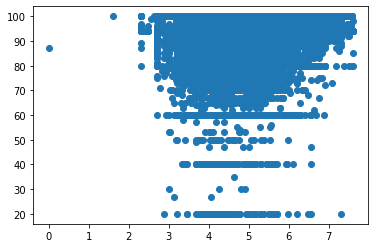

In [67]:
plt.scatter(df['log_price'],df['review_scores_rating']);

In [68]:
PWLF_model = pwlf.PiecewiseLinFit(df['log_price'],df['review_scores_rating'])

In [69]:
z = PWLF_model.fit(n_segments=2)

E:\Anaconda\lib\site-packages\pwlf\pwlf.py:1108: RuntimeWarning: invalid value encountered in double_scalars
  self.slopes[i] = (y_hat[i+1]-y_hat[i]) / \


In [70]:
slopes = PWLF_model.calc_slopes()

In [71]:
slopes

array([1.66932414, 0.63942191])

In [72]:
# predict for the determined points
yHat = PWLF_model.predict(df['review_scores_rating'])

# #calculate statistics
# p = PWLF_model.p_values(method='non-linear', step_size=1e-4) #p-values
# se = PWLF_model.se  # standard errors

In [73]:
metrics.mean_squared_error(df['log_price'],yHat,squared=False)

145.53121153644452

In [74]:
m_3 = LinearRegression()
m_3.fit(df[['log_price']],df[['review_scores_rating']])

LinearRegression()

In [75]:
metrics.mean_squared_error(df['log_price'],m_3.predict(df[['review_scores_rating']]),squared=False)

191.05365147230134